In [57]:
import math
import matplotlib.pyplot as plt
import numpy as np

Compute the stereographic projection, $f: S^2 -> R^2$, from the north pole (0; 0; 1) of the 2-sphere to the z = 0 plane.

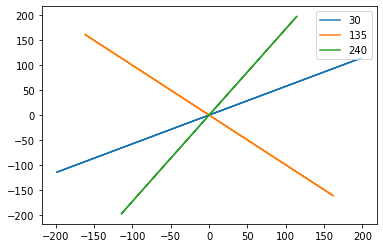

In [54]:
# Images of a longitudinal line, i.e., a great circle passing through the north and south poles

alphas = [30, 135, 240]
for a in alphas:
    x, y = [], []
    for theta in [float(t) / 2 for t in range(0, 720, 1)]:
        if theta != 90: #skip north pole
            xc = math.cos((theta*math.pi)/180) * math.cos((a*math.pi)/180)
            yc = math.cos((theta*math.pi)/180) * math.sin((a*math.pi)/180)
            zc = math.sin((theta*math.pi)/180)
                #sterographic projection coordinates
            xi = xc / (1-zc)
            yi = yc / (1-zc)
            x.append(xi)
            y.append(yi)
    plt.plot(x, y, label=a)
plt.legend(loc='upper right')
plt.show()

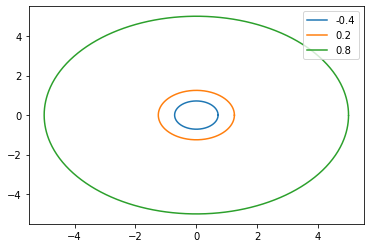

In [55]:
# Images of a latitude line, i.e., a circle formed by intersection with a horizontal plane (z = const:)

z = [-0.40, 0.2, 0.8]
for zc in z:
    x, y = [], []
    for theta in [float(t) / 2 for t in range(0, 720, 1)]:
        xc = math.cos((theta*math.pi)/180) 
        yc = math.sin((theta*math.pi)/180) 
            #sterographic projection coordinates
        xi = xc / (1-zc)
        yi = yc / (1-zc)
        x.append(xi)
        y.append(yi)
    plt.plot(x, y, label=zc)
plt.legend(loc='upper right')
plt.show()

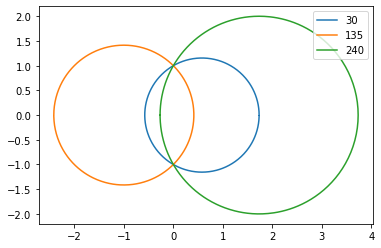

In [56]:
# Images of an arbitrary great circle (one that is not a longitudinal line or the equator)

alphas = [30, 135, 240]
for a in alphas:
    x, y = [], []
    for theta in [float(t) / 2 for t in range(0, 720, 1)]:
        if theta != 90: #skip north pole
            xc = math.cos((theta*math.pi)/180) * math.cos((a*math.pi)/180)
            yc = math.sin((theta*math.pi)/180)
            zc = math.cos((theta*math.pi)/180) * math.sin((a*math.pi)/180)
                #sterographic projection coordinates
            xi = xc / (1-zc)
            yi = yc / (1-zc)
            x.append(xi)
            y.append(yi)
    plt.plot(x, y, label=a)
plt.legend(loc='upper right')
plt.show()

Sample uniformly random points on the d-sphere, $S^d$, by first sampling $d + 1$ i.i.d. standard Gaussian random variables, $N(0, 1)$, to get a point $x = (x_1, x_2, ... , x_{d+1}) \in R^{d+1}$ and then projecting this point to the unit sphere. Sample 10,000 points on $S^d$ and compute their distance from the "equator", or great circle with $x_1$ = 0.

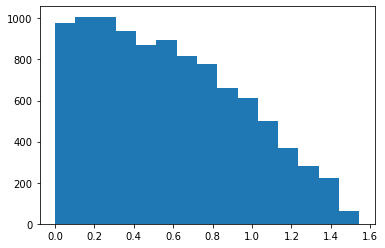

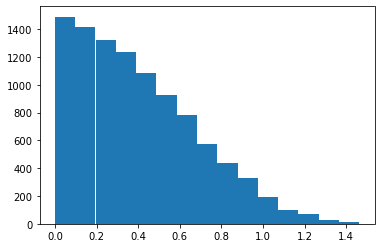

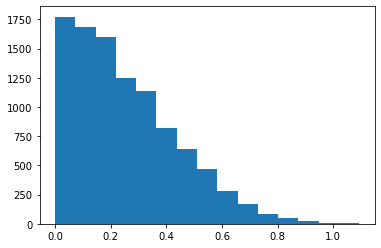

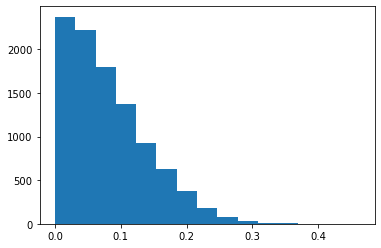

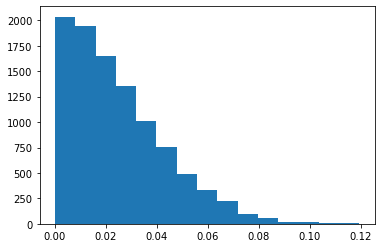

In [73]:
dimensions = [2, 4, 10, 100, 1000]
for d in dimensions:
    distances = []
    for i in range(0, 10000):
        components = np.random.normal(0, 1, d+1)
        components = components / np.linalg.norm(components)
        projection = np.copy(components)
        projection[0] = 0
        dist = math.acos((np.dot(components, projection)) / (np.linalg.norm(components)*np.linalg.norm(projection)))
        distances.append(dist)
    plt.hist(distances, 15)
    plt.show()

As d increases, the distribution of distances from the equator becomes clearly skewed to the right. This suggests that as you get farther from the equator, there are fewer uniform random points to sample from on the sphere. This result would be the same for any great sphere.

Now sample 1,000 pairs of points on $S^d$ and compute the angle between them.

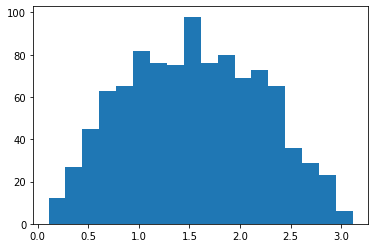

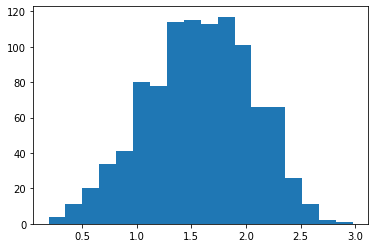

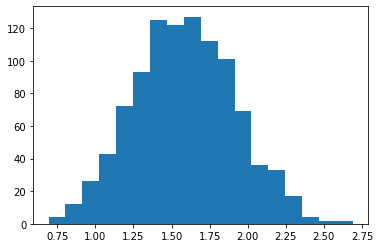

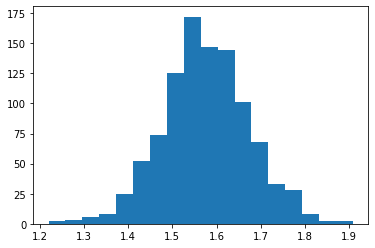

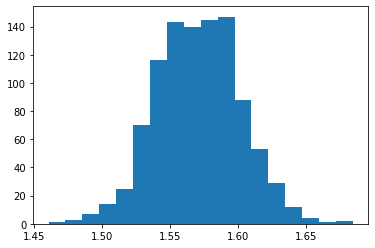

In [75]:
dimensions = [2, 4, 10, 100, 1000]
for d in dimensions:
    angles = []
    for i in range(0, 1000):
        components1 = np.random.normal(0, 1, d+1)
        components1 = components1 / np.linalg.norm(components1)
        components2 = np.random.normal(0, 1, d+1)
        components2 = components2 / np.linalg.norm(components2)
        angle = math.acos((np.dot(components1, components2)) / (np.linalg.norm(components1)*np.linalg.norm(components2)))
        angles.append(angle)
    plt.hist(angles, 18)
    plt.show()

As d increases, the angles approach a more normal distribution with lower standard deviation. This suggests that as the dimensions increases, the angles that points make with each other become less and less varied, clustering more around a specific angle.